# Customer Segmentation with RFM Analysis

## Business Problem

FLO, an online shoe store, wants to segment its customers and determine marketing strategies according to these segments. For this purpose, the behaviors of the customers will be defined and groups will be formed according to the clusters in these behaviors.

### Dataset Story


The dataset consists of the information obtained from the past shopping behaviors of customers who made their last purchases from Flo as OmniChannel (both online and offline shopper) in the years 2020-2021.

**master_id :** Unique customer number

**order_channel:** Which channel of the shopping platform is used (Android, ios, Desktop, Mobile)

**last_order_channel:** The channel where the most recent purchase was made

**first_order_date:** Date of the customer's first purchase

**last_order_date:** Customer's last purchase date

**last_order_date_online:** The date of the last purchase made by the customer on the online platform

**last_order_date_offline:**The date of the last purchase made by the customer on the offline platform

**order_num_total_ever_online:** The total number of purchases made by the customer on the online platform

**order_num_total_ever_offline:** Total number of purchases made by the customer offline

**customer_value_total_ever_offline:** Total fee paid by the customer for offline purchases

**customer_value_total_ever_online:** The total fee paid by the customer for their online shopping

**interested_in_categories_12:** List of categories the customer has shopped in the last 12 months




In [1]:
#Necessary libraries are imported.
import pandas as pd
import datetime as dt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) # Can be uncommented to see all dataset in one print
pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.set_option('display.width',125)

In [2]:
df_ = pd.read_csv("../input/flo-data-20k/flo_data_20k.csv")
df = df_.copy()

## Data Overview

In [3]:
#Number of rows and columns of the dataset
df.shape

(19945, 12)

In [4]:
#The first 5 rows of the dataset were looked at.
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,140,799,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,160,1854,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3,2,190,395,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1,1,40,82,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1,1,50,160,[AKTIFSPOR]


In [5]:
#The last 5 rows of the dataset were viewed.
df.tail()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1,2,290,112,"[ERKEK, AKTIFSPOR]"
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1,1,150,240,[AKTIFSPOR]
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2,1,140,493,[AKTIFSPOR]
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1,5,712,298,"[ERKEK, AKTIFSPOR]"
19944,740998d2-b1f7-11e9-89fa-000d3a38a36f,Android App,Android App,2019-09-03,2020-06-06,2020-06-06,2019-09-03,1,1,40,222,"[KADIN, AKTIFSPOR]"


In [6]:
#Variable types and numbers of the data set were examined.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [7]:
#It was checked for missing data in the dataset.
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [8]:
#The statistical properties of the columns of the data set containing numeric data were checked.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945,3,4,1,1,2,4,200
order_num_total_ever_offline,19945,2,2,1,1,1,2,109
customer_value_total_ever_offline,19945,254,302,10,100,180,320,18119
customer_value_total_ever_online,19945,497,833,13,150,286,578,45220


In [9]:
#The number of unique values for each variable in the dataset was looked at.
df.nunique()

master_id                            19945
order_channel                            4
last_order_channel                       5
first_order_date                      2465
last_order_date                        366
last_order_date_online                1743
last_order_date_offline                738
order_num_total_ever_online             57
order_num_total_ever_offline            32
customer_value_total_ever_offline     6097
customer_value_total_ever_online     11292
interested_in_categories_12             32
dtype: int64

## Data Manipulation

In [10]:
"""
Omnichannel means that customers shop from both online and offline platforms.
New variables were created for the total number of purchases and spending of each customer.
"""

df["total_order_num"] = df ["order_num_total_ever_online"] + df ["order_num_total_ever_offline"]
df["total_price"] = df ["customer_value_total_ever_offline"] + df ["customer_value_total_ever_online"]
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num,total_price
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,140,799,[KADIN],5,939
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,160,1854,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2014
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3,2,190,395,"[ERKEK, KADIN]",5,585
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1,1,40,82,"[AKTIFCOCUK, COCUK]",2,122
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1,1,50,160,[AKTIFSPOR],2,210


In [11]:
#The data types of the date variables are changed with datetime module to be able to use them in date calculations.
convert_date = df.columns[df.columns.str.contains("date")]

df[convert_date] = df[convert_date].apply(pd.to_datetime)
df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
total_order_num                             float64
total_price                                 float64
dtype: object

In [12]:
"""
We analyzed the distribution of the number of customers in the shopping channels,
the total number of products purchased and the total expenditures.
"""
df.groupby("order_channel").agg({"master_id" : "nunique", "total_order_num": "sum", "total_price": "sum" })


,master_id,total_order_num,total_price
order_channel,,,
Android App,9495,52269,7819063
Desktop,2735,10920,1610321
Ios App,2833,15351,2526000
Mobile,4882,21679,3028183


In [13]:
#The top 5 customers with the highest earnings were listed.
df.sort_values(by = "total_price",ascending=False).head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num,total_price
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200,2,685,45220,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202,45905
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67,1,130,36688,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68,36818
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81,1,1264,32654,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82,33918
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10,1,539,30688,"[ERKEK, KADIN, AKTIFSPOR]",11,31227
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1,3,18119,2587,[AKTIFSPOR],4,20706


In [14]:
#The top 5 customers with the most orders were listed.
df.sort_values(by = "total_order_num",ascending=False).head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num,total_price
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200,2,685,45220,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202,45905
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130,1,50,12232,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131,12282
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2,109,10239,144,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111,10383
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1,87,8432,140,[ERKEK],88,8572
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2,81,3998,243,[ERKEK],83,4240


In [15]:
"""For the RFM analysis we have to choose a analysis date, 
The date 2 days after the last purchase is selected.
"""
print(df.last_order_date.max())
today_date=dt.datetime(2021,6,1)


2021-05-30 00:00:00


In [16]:
"""
For the RFM analysis, 
Recency, Frequency and Monetary metrics are calculated and stored in to a dataframe.
"""
rfm = pd.DataFrame()
rfm["customer_id"] = df["master_id"]
rfm["recency"] = (today_date - df["last_order_date"]).astype('timedelta64[D]')
rfm["frequency"] = df["total_order_num"]
rfm["monetary"] = df["total_price"]
rfm.head()

,customer_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5,939
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21,2014
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5,585
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2,122
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2,210


In [17]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,19945,134,103,2,43,111,202,367
frequency,19945,5,5,2,3,4,6,202
monetary,19945,751,895,45,340,545,898,45905


In [18]:
"""
Recency, Frequency and Monetary 
metrics were converted to scores between 1-5 with the help of qcut.
"""
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels = [5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels = [1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels = [1,2,3,4,5])
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5,939,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21,2014,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5,585,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2,122,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2,210,3,1,1


In [19]:
#The recency_score and frequency_score were expressed as a single variable and recorded as RF_SCORE.
rfm["rf_score"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5,939,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21,2014,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5,585,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2,122,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2,210,3,1,1,31


In [20]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

### Visualization of seg_map

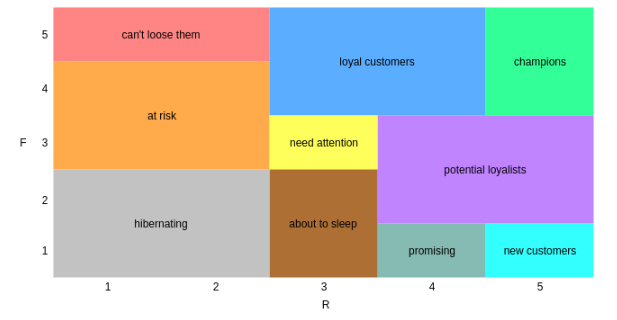

In [21]:
rfm["segment"] = rfm['rf_score'].replace(seg_map, regex=True)
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5,939,3,4,4,34,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21,2014,3,5,5,35,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5,585,2,4,3,24,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2,122,3,1,1,31,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2,210,3,1,1,31,about_to_sleep


In [22]:
#The recency, frequency and monetary averages of the segments were examined.
rfm.groupby("segment").agg({"recency": "mean", "frequency": "mean", "monetary": "mean"})

,recency,frequency,monetary
segment,,,
about_to_sleep,114,2,359
at_Risk,242,4,647
cant_loose,235,11,1474
champions,17,9,1407
hibernating,248,2,366
loyal_customers,83,8,1217
need_attention,114,4,562
new_customers,18,2,340
potential_loyalists,37,3,533


# RFM Analysis

**For example:** FLO includes a new women's shoe brand. The product prices of the brand it includes are above the general customer preferences. For this reason, it is desired to contact the customers in the profile that will be interested in the promotion of the brand and product sales.

Those who shop from their loyal customers (champions, loyal_customers) and women category are the customers to be contacted specifically. The id numbers of these customers were saved in the csv file.

In [23]:
filter1 =(rfm["segment"] =="champions") | (rfm["segment"] =="loyal_customers")
filter2 =(df["interested_in_categories_12"].str.contains("KADIN"))
target_customers = df[filter1 & filter2]["master_id"]
target_customers.to_csv("yeni_marka_hedef_müşteri_id.csv", index=False)
target_customers.head()

0     cc294636-19f0-11eb-8d74-000d3a38a36f
1     f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8     cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11    c2e15af2-9eed-11e9-9897-000d3a38a36f
33    fb840306-1219-11ea-a001-000d3a38a36f
Name: master_id, dtype: object

**For example:** Nearly 40% discount is planned for Men's and Children's products. It is aimed to specifically target customers who are good customers in the past, but who have not shopped for a long time, who are interested in the categories related to this discount, who should not be lost, those who are asleep and new customers. The ids of the customers in the appropriate profile are saved in the csv file.

In [24]:
filter3 =(rfm["segment"] =="cant_loose") | (rfm["segment"] =="hibernating")| (rfm["segment"] =="new_customers")
filter4 =(df["interested_in_categories_12"].str.contains("ERKEK")|df["interested_in_categories_12"].str.contains("COCUK"))
discount_customers = df[filter3 & filter4]["master_id"]
discount_customers.to_csv("yeni_marka_hedef_müşteri_id.csv", index=False)
discount_customers.head()

7     3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f
10    ae608ece-c9d8-11ea-a31e-000d3a38a36f
15    13ed97a4-b167-11e9-89fa-000d3a38a36f
19    2730793e-3908-11ea-85d6-000d3a38a36f
21    7b289956-d691-11e9-93bc-000d3a38a36f
Name: master_id, dtype: object